In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("full.csv")

In [7]:
df.head()

,track,track_id,artist,album,sp_release_date,duration,explicit,danceability,energy,key,...,liveness,valence,tempo,time_signature,playcount,video_id,view,channelTitle,yt_release_date,title
0,Shape of You,0FE9t6xYkqWXU2ahLh6D8X,Ed Sheeran,Shape of You,2017-01-06,03:54,False,0.825,0.652,1,...,0.0931,0.931,95.977,4,2971854102,JGwWNGJdvx8,5533840092,Ed Sheeran,2017-01-30T10:57:50Z,Ed Sheeran - Shape of You (Official Music Video)
1,Blinding Lights,0sf12qNH5qcw8qpgymFOqD,The Weeknd,Blinding Lights,2019-11-29,03:22,False,0.513,0.796,1,...,0.0938,0.345,171.017,4,2636804603,fHI8X4OXluQ,611764719,TheWeekndVEVO,2019-11-29T05:00:08Z,The Weeknd - Blinding Lights (Official Audio)
2,Dance Monkey,5ZULALImTm80tzUbYQYM9d,Tones And I,The Kids Are Coming,2019-08-29,03:29,False,0.824,0.588,6,...,0.1490,0.513,98.027,4,2407586466,q0hyYWKXF0Q,1732473790,Tones And I,2019-06-24T22:01:36Z,TONES AND I - DANCE MONKEY (OFFICIAL VIDEO)
3,rockstar,7wGoVu4Dady5GV0Sv4UIsx,Post Malone,rockstar,2017-09-15,03:38,True,0.577,0.522,5,...,0.1420,0.119,159.772,4,2299920941,UceaB4D0jpo,930777018,PostMaloneVEVO,2017-11-22T05:00:01Z,Post Malone - rockstar ft. 21 Savage
4,One Dance,1xznGGDReH1oQq0xzbwXa3,Drake,Views,2016-05-06,02:54,False,0.791,0.619,1,...,0.3510,0.371,103.989,4,2169189786,iAbnEUA0wpA,125034981,Chris Obando,2018-10-30T17:26:40Z,One Dance-Drake (feat. Wizkid &amp; Kyla)


In [4]:
df.columns

Index(['track', 'track_id', 'artist', 'album', 'sp_release_date', 'duration',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'playcount', 'video_id', 'view', 'channelTitle',
       'yt_release_date', 'title'],
      dtype='object')

In [36]:
pearson_view = {}
pearson_playcount = {}
spearman_view = {}
spearman_playcount = {}
feature = ['danceability', 'energy', 'loudness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df_feature = df[feature]

for col in feature:
	pearson_playcount[col] = df['playcount'].corr(df[col], method='pearson')
	pearson_view[col] = df['view'].corr(df[col], method='pearson')
	spearman_view[col] = df['view'].corr(df[col], method='spearman')
	spearman_playcount[col] = df['playcount'].corr(df[col], method='spearman')

corr = pd.DataFrame(columns=feature)
corr = corr.append(pearson_playcount, ignore_index=True)
corr = corr.append(pearson_view, ignore_index=True)
corr = corr.append(spearman_playcount, ignore_index=True)
corr = corr.append(spearman_view, ignore_index=True)
corr['type'] = ['pearson_playcount', 'pearson_view', 'spearman_playcount', 'spearman_view']
corr = corr.set_index("type")
corr.head()


,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
type,,,,,,,,
pearson_playcount,0.068073,-0.048913,0.035358,-0.017690,-0.057566,-0.037826,0.002875,-0.035693
pearson_view,0.096071,0.084030,0.155144,-0.011438,-0.057533,-0.011889,0.086404,-0.008357
spearman_playcount,0.063136,-0.042373,0.023765,0.002649,-0.082468,-0.037102,0.032095,-0.031510
spearman_view,0.111380,0.144883,0.229751,0.057169,-0.095603,-0.007125,0.092280,0.015850


<AxesSubplot:ylabel='type'>

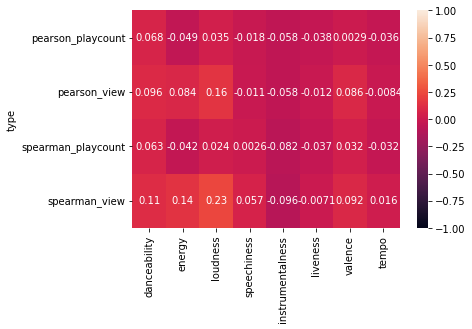

In [37]:
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

KeyboardInterrupt: 

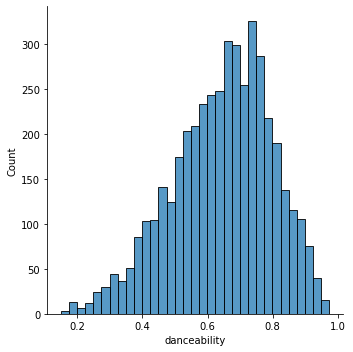

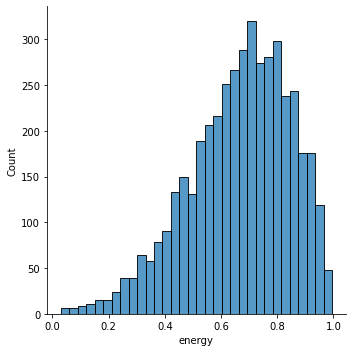

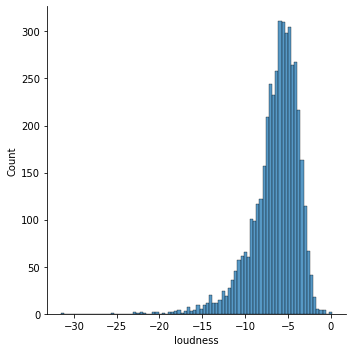

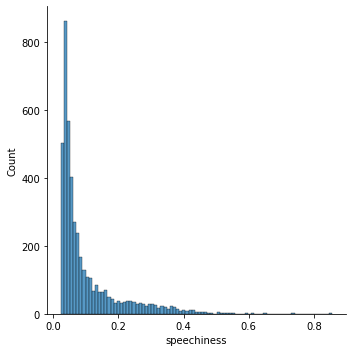

In [39]:
for col in feature:
	sns.displot(df_feature[col])

In [38]:
df['playcount'].corr(df['view'], method='pearson')

0.5859106689136782

<AxesSubplot:xlabel='playcount', ylabel='view'>

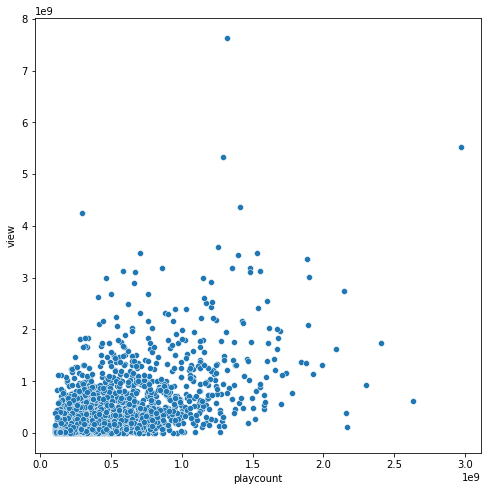

In [20]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="playcount", y="view", hue=None, ax=ax)
# sns.scatterplot(data=df, x="playcount", y="view", hue=None, ax=axs[1])
# plt.show()
# plt.scatter(df['playcount'], df['view'])
# plt.xlabel('playcount')
# plt.ylabel('view')
# plt.show()